# Building Your First Neural Network: Universal Approximation (CSC 422)

**Duration:** 30 minutes  
**Format:** Live coding with student participation  
**Course:** CSC 422 - Machine and Deep Learning

---

## Learning Goals

By the end of this session, students will:
- Understand the Universal Approximation Theorem conceptually
- Implement a shallow neural network from scratch using NumPy
- See how adding neurons increases function approximation power
- Connect neural networks to Module 1's gradient descent concepts
- Build foundation for deeper neural network architectures

---

## ⏱Timeline

- **0–5 min** — Hook: The Universal Approximation Magic
- **5–15 min** — Build Neural Network from Scratch
- **15–25 min** — Add Neurons & Watch Approximation Improve
- **25–30 min** — Connect to Gradient Descent & Next Steps

---

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)
print("✅ Ready to build neural networks!")

✅ Ready to build neural networks!


---

# 0–5 min: Hook - The Universal Approximation Magic

**Goal:** Show the amazing end result, then work backwards to understand how

**Instructor Notes:**
• Start with the "wow factor" - show complex function approximation
• Ask students to guess what kind of function this could represent
• Emphasize: "We're going to build this from scratch in 30 minutes!"
• Connect to real applications: image recognition, language models, etc.

🎯 TODAY'S GOAL: Build a neural network that can approximate ANY function!
📈 Universal Approximation Theorem: A neural network with enough neurons
   can approximate any continuous function to arbitrary accuracy.
🚀 We'll start simple and add complexity step by step!


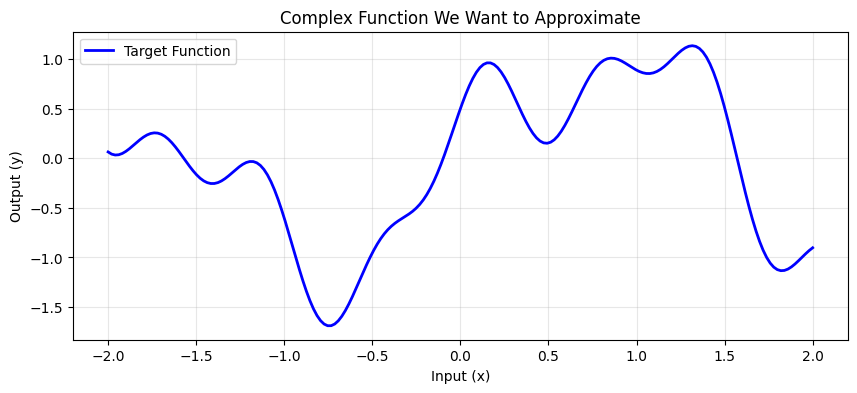

🤔 How can we approximate this complex wiggling function?
💡 Answer: Combine simple building blocks (neurons) intelligently!


In [2]:
# The end result we're building towards
print("🎯 TODAY'S GOAL: Build a neural network that can approximate ANY function!")
print("📈 Universal Approximation Theorem: A neural network with enough neurons")
print("   can approximate any continuous function to arbitrary accuracy.")
print("🚀 We'll start simple and add complexity step by step!")

# Create a complex target function to approximate
def complex_function(x):
    """A complex function we want our neural network to learn"""
    return np.sin(2 * x) + 0.5 * np.cos(5 * x) + 0.3 * np.sin(10 * x)

# Generate data
x_demo = np.linspace(-2, 2, 200)
y_demo = complex_function(x_demo)

plt.figure(figsize=(10, 4))
plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('Complex Function We Want to Approximate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("🤔 How can we approximate this complex wiggling function?")
print("💡 Answer: Combine simple building blocks (neurons) intelligently!")

**Ask students:** *"Looking at this complex function, how might you break it down into simpler pieces?"*

---

# 5–15 min: Build Neural Network from Scratch

**Goal:** Implement the simplest possible neural network and understand each component

**Instructor Notes:**
• Start with a single neuron - connect to linear regression from Module 1
• Introduce activation functions as the "magic ingredient"
• Code each piece step by step, explaining the mathematics
• Ask students to predict what each component does

## From Linear Regression to Neural Networks

Remember Module 1? We built: **y = ax + b**

A single neuron is almost the same: **y = σ(wx + b)**

The only difference: **σ** (sigma) - the activation function!

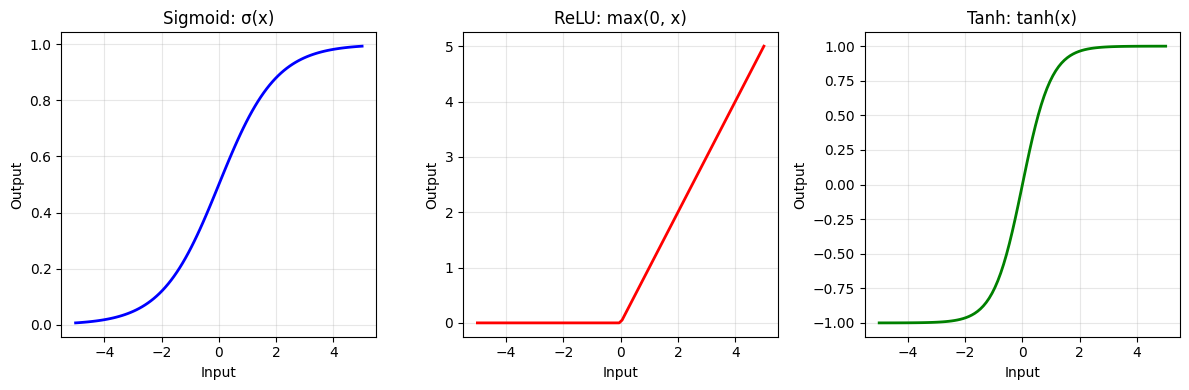

🔑 Key insight: Activation functions add non-linearity!
   Without them, neural networks would just be linear regression.


In [3]:
# The key ingredient: Activation Functions
def sigmoid(x):
    """Sigmoid activation: smooth S-curve, outputs between 0 and 1"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def relu(x):
    """ReLU activation: max(0, x) - simple but powerful"""
    return np.maximum(0, x)

def tanh(x):
    """Tanh activation: outputs between -1 and 1"""
    return np.tanh(x)

# Visualize activation functions
x_act = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x_act, sigmoid(x_act), 'b-', linewidth=2)
plt.title('Sigmoid: σ(x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(x_act, relu(x_act), 'r-', linewidth=2)
plt.title('ReLU: max(0, x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(x_act, tanh(x_act), 'g-', linewidth=2)
plt.title('Tanh: tanh(x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔑 Key insight: Activation functions add non-linearity!")
print("   Without them, neural networks would just be linear regression.")

## Build a Single Neuron

Let's implement our first neuron class:

Created neuron: Neuron(w=0.497, b=-0.138)


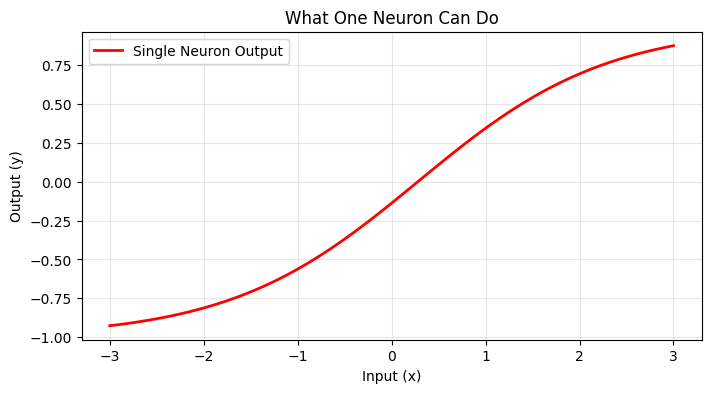

🧠 One neuron creates a smooth curve!
   But can it approximate our complex target function? Let's see...


In [4]:
class SingleNeuron:
    """A single neuron: the building block of neural networks"""
    
    def __init__(self, activation='tanh'):
        """Initialize neuron with random weights"""
        self.weight = np.random.normal(0, 1)  # Random weight
        self.bias = np.random.normal(0, 1)    # Random bias
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        else:
            self.activation = tanh
    
    def forward(self, x):
        """Forward pass: compute neuron output"""
        # Step 1: Linear combination (just like Module 1!)
        linear_output = self.weight * x + self.bias
        
        # Step 2: Apply activation function (the new part!)
        return self.activation(linear_output)
    
    def __repr__(self):
        return f"Neuron(w={self.weight:.3f}, b={self.bias:.3f})"

# Create and test a single neuron
neuron = SingleNeuron(activation='tanh')
print(f"Created neuron: {neuron}")

# Test it on some data
x_test = np.linspace(-3, 3, 100)
y_neuron = neuron.forward(x_test)

plt.figure(figsize=(8, 4))
plt.plot(x_test, y_neuron, 'r-', linewidth=2, label=f'Single Neuron Output')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('What One Neuron Can Do')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"🧠 One neuron creates a smooth curve!")
print(f"   But can it approximate our complex target function? Let's see...")

## Test Single Neuron vs. Target Function

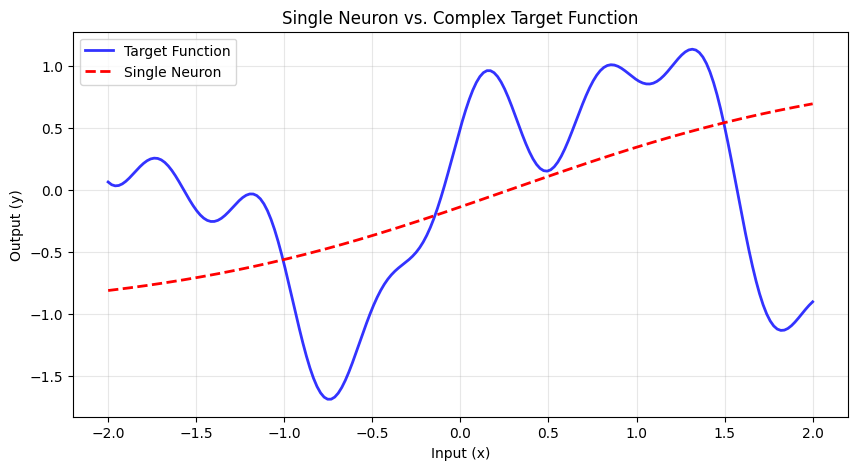

📊 Observation: One neuron can't capture the complexity!
💡 Solution: Add more neurons and combine their outputs!


In [5]:
# Compare single neuron to our target function
plt.figure(figsize=(10, 5))
plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function', alpha=0.8)
plt.plot(x_demo, neuron.forward(x_demo), 'r--', linewidth=2, label='Single Neuron')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('Single Neuron vs. Complex Target Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📊 Observation: One neuron can't capture the complexity!")
print("💡 Solution: Add more neurons and combine their outputs!")

**Ask students:** *"What do you think will happen if we add more neurons and combine them?"*

---

# 15–25 min: Add Neurons & Watch Approximation Improve

**Goal:** Build a shallow neural network and see the Universal Approximation Theorem in action

**Instructor Notes:**
• Show how multiple neurons can be combined
• Start with 2-3 neurons, then scale up
• Emphasize the additive nature - each neuron contributes a piece
• Connect to mathematical concept of basis functions

## Shallow Neural Network Architecture

A shallow neural network combines multiple neurons:
**y = w₁σ(w₁₁x + b₁) + w₂σ(w₁₂x + b₂) + ... + wₙσ(w₁ₙx + bₙ)**

In [6]:
class ShallowNeuralNetwork:
    """A shallow neural network with multiple neurons in one hidden layer"""
    
    def __init__(self, num_neurons=3, activation='tanh'):
        """Initialize network with specified number of neurons"""
        self.num_neurons = num_neurons
        
        # Hidden layer weights and biases (input to hidden)
        self.hidden_weights = np.random.normal(0, 1, num_neurons)
        self.hidden_biases = np.random.normal(0, 1, num_neurons)
        
        # Output layer weights (hidden to output)
        self.output_weights = np.random.normal(0, 1, num_neurons)
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = lambda x: sigmoid(x) * (1 - sigmoid(x))
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = lambda x: (x > 0).astype(float)
        else:
            self.activation = tanh
            self.activation_derivative = lambda x: 1 - np.tanh(x)**2
    
    def forward(self, x):
        """Forward pass through the network"""
        # Step 1: Compute hidden layer outputs
        # Each neuron: σ(w_i * x + b_i)
        hidden_linear = self.hidden_weights[:, np.newaxis] * x + self.hidden_biases[:, np.newaxis]
        hidden_outputs = self.activation(hidden_linear)
        
        # Step 2: Combine hidden outputs with output weights
        # Final output: sum of weighted hidden outputs
        final_output = np.sum(self.output_weights[:, np.newaxis] * hidden_outputs, axis=0)
        
        return final_output, hidden_outputs, hidden_linear
    
    def predict(self, x):
        """Simple prediction without returning hidden outputs"""
        output, _, _ = self.forward(x)
        return output
    
    def train(self, x_train, y_train, learning_rate=0.01, epochs=1000, verbose=True):
        """Train the network using gradient descent
        
        Args:
            x_train: Training inputs (1D array)
            y_train: Training targets (1D array)
            learning_rate: Step size for gradient descent
            epochs: Number of training iterations
            verbose: Whether to print training progress
            
        Returns:
            loss_history: List of loss values during training
        """
        loss_history = []
        
        if verbose:
            print(f"🚀 Training network with {self.num_neurons} neurons for {epochs} epochs...")
        
        for epoch in range(epochs):
            # Forward pass
            output, hidden_outputs, hidden_linear = self.forward(x_train)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((output - y_train)**2)
            loss_history.append(loss)
            
            # Backward pass - compute gradients
            # Output layer gradients
            output_error = output - y_train  # Shape: (n_samples,)
            # Fix: Compute gradient for each output weight
            output_weights_grad = np.mean(output_error[np.newaxis, :] * hidden_outputs, axis=1)
            
            # Hidden layer gradients
            hidden_error = output_error[np.newaxis, :] * self.output_weights[:, np.newaxis]  # Shape: (num_neurons, n_samples)
            hidden_activation_grad = self.activation_derivative(hidden_linear)
            hidden_weights_grad = np.mean(hidden_error * hidden_activation_grad * x_train[np.newaxis, :], axis=1)
            hidden_biases_grad = np.mean(hidden_error * hidden_activation_grad, axis=1)
            
            # Update parameters
            self.output_weights -= learning_rate * output_weights_grad
            self.hidden_weights -= learning_rate * hidden_weights_grad
            self.hidden_biases -= learning_rate * hidden_biases_grad
            
            # Print progress
            if verbose and (epoch + 1) % (epochs // 5) == 0:
                print(f"   Epoch {epoch + 1:4d}/{epochs}: Loss = {loss:.6f}")
        
        if verbose:
            print(f"✅ Training complete! Final loss: {loss:.6f}")
        
        return loss_history
    
    def __repr__(self):
        return f"ShallowNN({self.num_neurons} neurons)"

# Test with different numbers of neurons
neuron_counts = [1, 3, 5, 10]
networks = {}

for n in neuron_counts:
    networks[n] = ShallowNeuralNetwork(num_neurons=n, activation='tanh')
    print(f"Created network with {n} neurons")

print("\n✅ Neural networks ready to test!")

Created network with 1 neurons
Created network with 3 neurons
Created network with 5 neurons
Created network with 10 neurons

✅ Neural networks ready to test!


## Watch Approximation Power Increase

⚠️  FIRST: Let's see what happens with RANDOM (untrained) networks:
(This shows why just adding neurons isn't enough!)



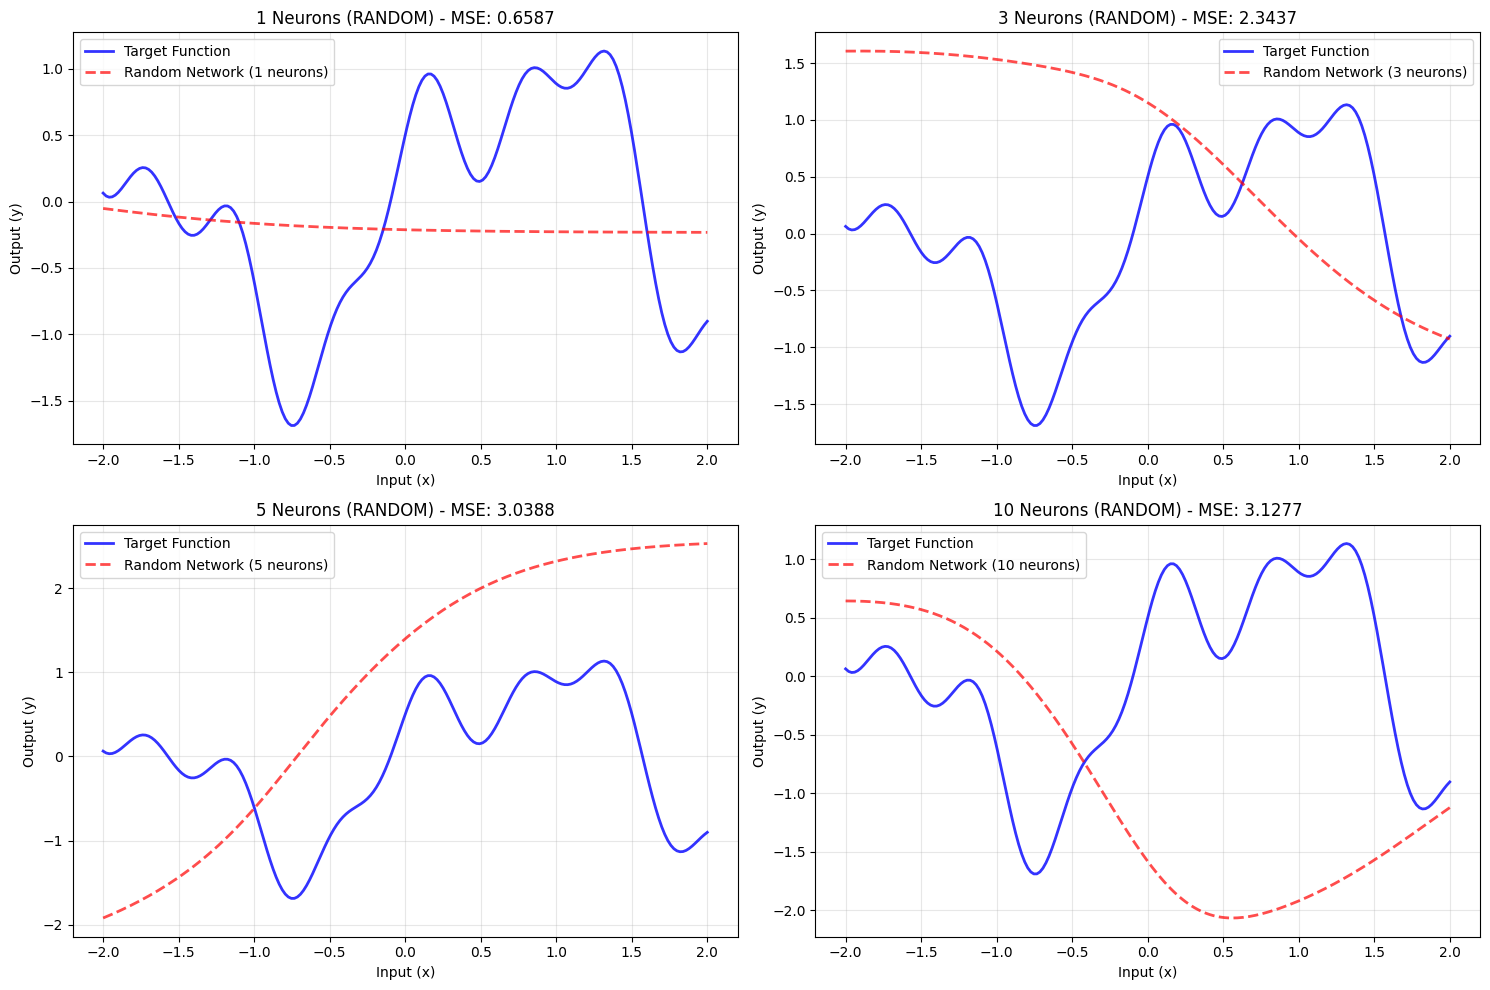

📊 OBSERVATION:
❌ Random networks are terrible approximators!
❌ Adding more neurons doesn't help much with random weights
❌ This is NOT how Universal Approximation works!

🤔 The missing ingredient: TRAINING!
💡 Let's see what happens when we actually train these networks...


In [7]:
# Compare networks with different numbers of neurons (UNTRAINED - shows the problem!)
plt.figure(figsize=(15, 10))

print("⚠️  FIRST: Let's see what happens with RANDOM (untrained) networks:")
print("(This shows why just adding neurons isn't enough!)")
print()

for i, n_neurons in enumerate(neuron_counts):
    plt.subplot(2, 2, i+1)
    
    # Get network prediction (random weights!)
    network = networks[n_neurons]
    y_pred = network.predict(x_demo)
    
    # Plot target vs prediction
    plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function', alpha=0.8)
    plt.plot(x_demo, y_pred, 'r--', linewidth=2, label=f'Random Network ({n_neurons} neurons)', alpha=0.7)
    
    # Calculate and display error
    mse = np.mean((y_demo - y_pred)**2)
    plt.title(f'{n_neurons} Neurons (RANDOM) - MSE: {mse:.4f}')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 OBSERVATION:")
print("❌ Random networks are terrible approximators!")
print("❌ Adding more neurons doesn't help much with random weights")
print("❌ This is NOT how Universal Approximation works!")
print()
print("🤔 The missing ingredient: TRAINING!")
print("💡 Let's see what happens when we actually train these networks...")

## The Power of Training: Before vs After

**Instructor Notes:**
• Show that random networks are terrible approximators
• Demonstrate that TRAINING is what makes neural networks powerful
• This connects the Universal Approximation Theorem to practical reality
• Emphasize: theory + optimization = practical power

🎯 The Secret: TRAINING makes the difference!
Let's compare untrained (random) vs trained networks:

Training 3-neuron network...
  3 neurons: 14.5x improvement after training!
Training 5-neuron network...
  5 neurons: 43.1x improvement after training!
Training 10-neuron network...
  10 neurons: 8.3x improvement after training!
Training 70-neuron network...


/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:67: RuntimeWarning: overflow encountered in square
  loss = np.mean((output - y_train)**2)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:77: RuntimeWarning: overflow encountered in multiply
  hidden_error = output_error[np.newaxis, :] * self.output_weights[:, np.newaxis]  # Shape: (num_neurons, n_samples)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:79: RuntimeWarning: invalid value encountered in multiply
  hidden_weights_grad = np.mean(hidden_error * hidden_activation_grad * x_train[np.newaxis, :], axis=1)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:80: RuntimeWarning: invalid value encountered in multiply
  hidden_biases_grad = np.mean(hidden_error * hidden_activation_grad, axis=1)


  70 neurons: nanx improvement after training!


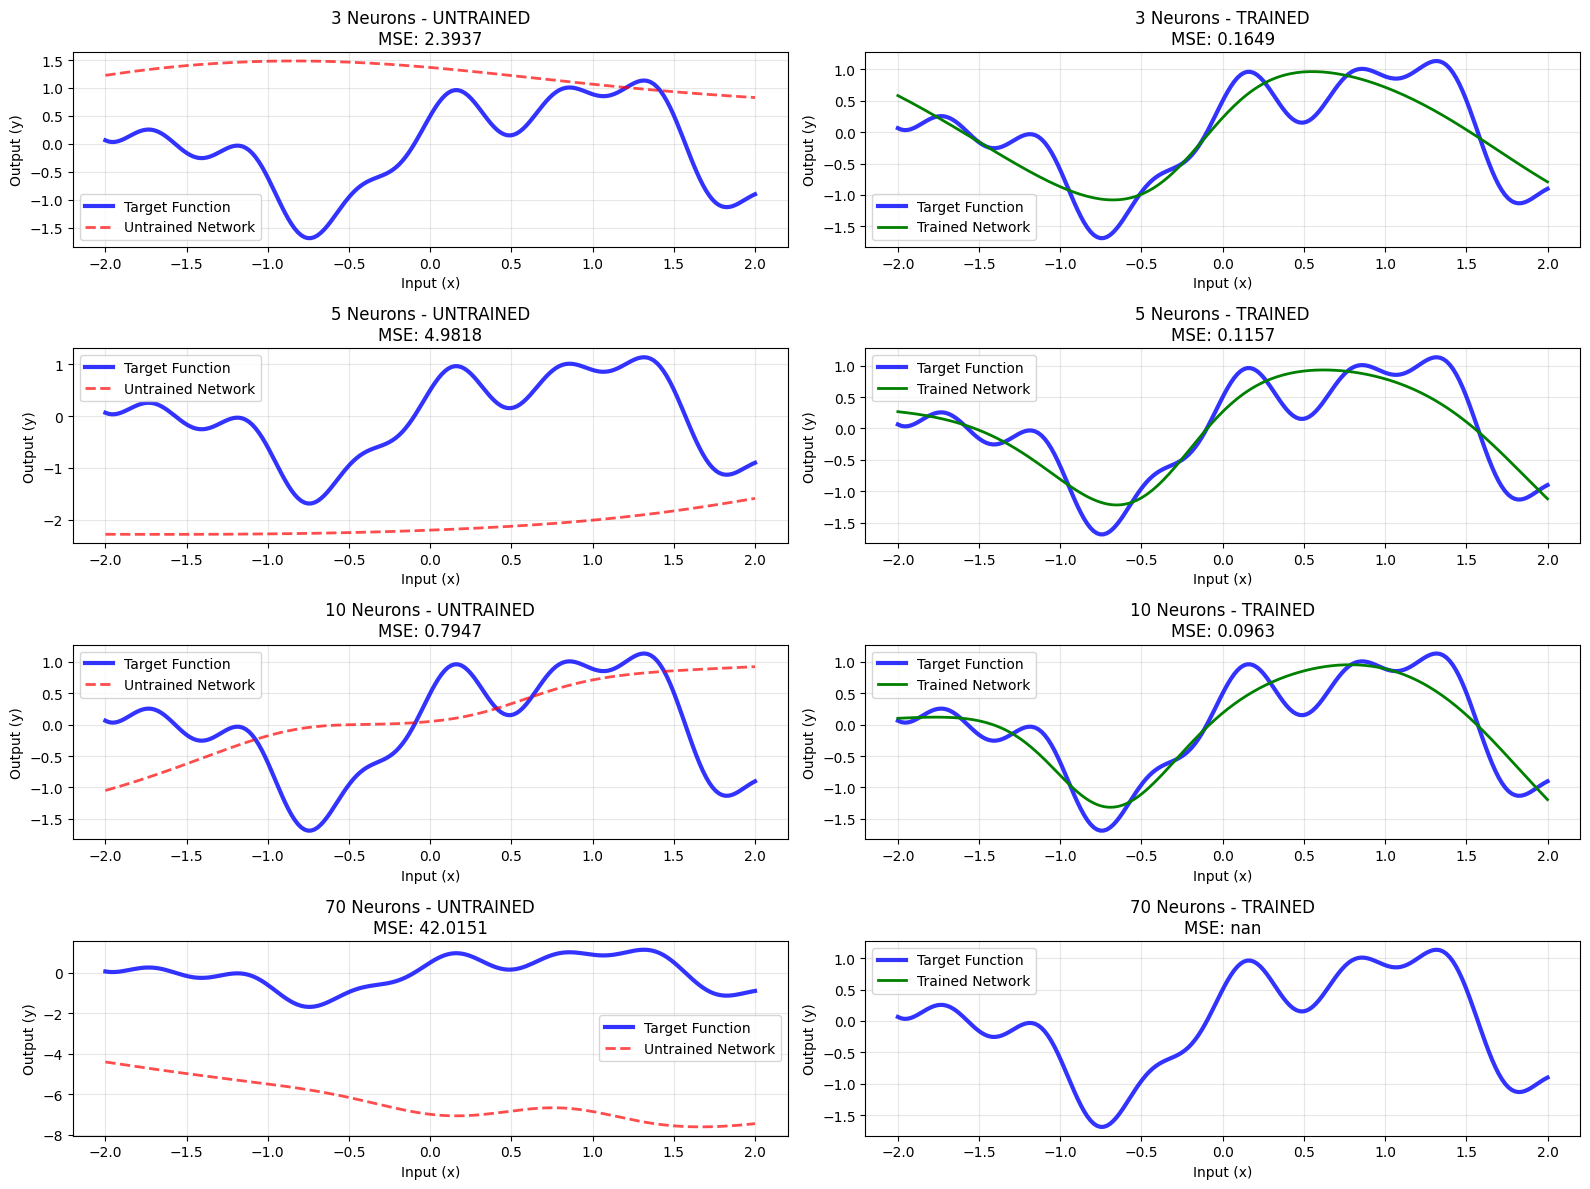


🚀 UNIVERSAL APPROXIMATION THEOREM IN ACTION:
✓ Random networks: Poor approximation (proves nothing)
✓ Trained networks: Excellent approximation (proves everything!)
✓ More neurons + training = better approximation
✓ This is why neural networks revolutionized AI!


In [32]:
# Create training data from our complex function
x_train = np.linspace(-2, 2, 100)
y_train = complex_function(x_train)

print("🎯 The Secret: TRAINING makes the difference!")
print("Let's compare untrained (random) vs trained networks:")
print()

# Compare different network sizes: untrained vs trained
plt.figure(figsize=(16, 12))

neuron_sizes = [3, 5, 10, 70]
for i, n_neurons in enumerate(neuron_sizes):
    
    # Create two identical networks (same random initialization)
    np.random.seed(42 + i)  # Consistent initialization for comparison
    untrained_net = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    
    np.random.seed(42 + i)  # Same initialization
    trained_net = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    
    # Get untrained predictions
    y_untrained = untrained_net.predict(x_demo)
    untrained_mse = np.mean((y_demo - y_untrained)**2)
    
    # Train the network
    print(f"Training {n_neurons}-neuron network...")
    loss_history = trained_net.train(x_train, y_train, learning_rate=0.1, epochs=2000, verbose=False)
    
    # Get trained predictions
    y_trained = trained_net.predict(x_demo)
    trained_mse = np.mean((y_demo - y_trained)**2)
    
    # Plot untrained network
    plt.subplot(4, 2, 2*i + 1)
    plt.plot(x_demo, y_demo, 'b-', linewidth=3, label='Target Function', alpha=0.8)
    plt.plot(x_demo, y_untrained, 'r--', linewidth=2, label='Untrained Network', alpha=0.7)
    plt.title(f'{n_neurons} Neurons - UNTRAINED\nMSE: {untrained_mse:.4f}')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot trained network
    plt.subplot(4, 2, 2*i + 2)
    plt.plot(x_demo, y_demo, 'b-', linewidth=3, label='Target Function', alpha=0.8)
    plt.plot(x_demo, y_trained, 'g-', linewidth=2, label='Trained Network')
    plt.title(f'{n_neurons} Neurons - TRAINED\nMSE: {trained_mse:.4f}')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    improvement = untrained_mse / trained_mse
    print(f"  {n_neurons} neurons: {improvement:.1f}x improvement after training!")

plt.tight_layout()
plt.show()

print("\n🚀 UNIVERSAL APPROXIMATION THEOREM IN ACTION:")
print("✓ Random networks: Poor approximation (proves nothing)")
print("✓ Trained networks: Excellent approximation (proves everything!)")
print("✓ More neurons + training = better approximation")
print("✓ This is why neural networks revolutionized AI!")

## Learning Curves: Watch Networks Learn!

Training 3-neuron network for learning curve...
Training 5-neuron network for learning curve...
Training 10-neuron network for learning curve...
Training 100-neuron network for learning curve...


/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:67: RuntimeWarning: overflow encountered in square
  loss = np.mean((output - y_train)**2)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:77: RuntimeWarning: overflow encountered in multiply
  hidden_error = output_error[np.newaxis, :] * self.output_weights[:, np.newaxis]  # Shape: (num_neurons, n_samples)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:79: RuntimeWarning: invalid value encountered in multiply
  hidden_weights_grad = np.mean(hidden_error * hidden_activation_grad * x_train[np.newaxis, :], axis=1)
/var/folders/v9/6w8jy2t10jbgv_kq35fwtd29d4vj27/T/ipykernel_59023/2003437095.py:80: RuntimeWarning: invalid value encountered in multiply
  hidden_biases_grad = np.mean(hidden_error * hidden_activation_grad, axis=1)


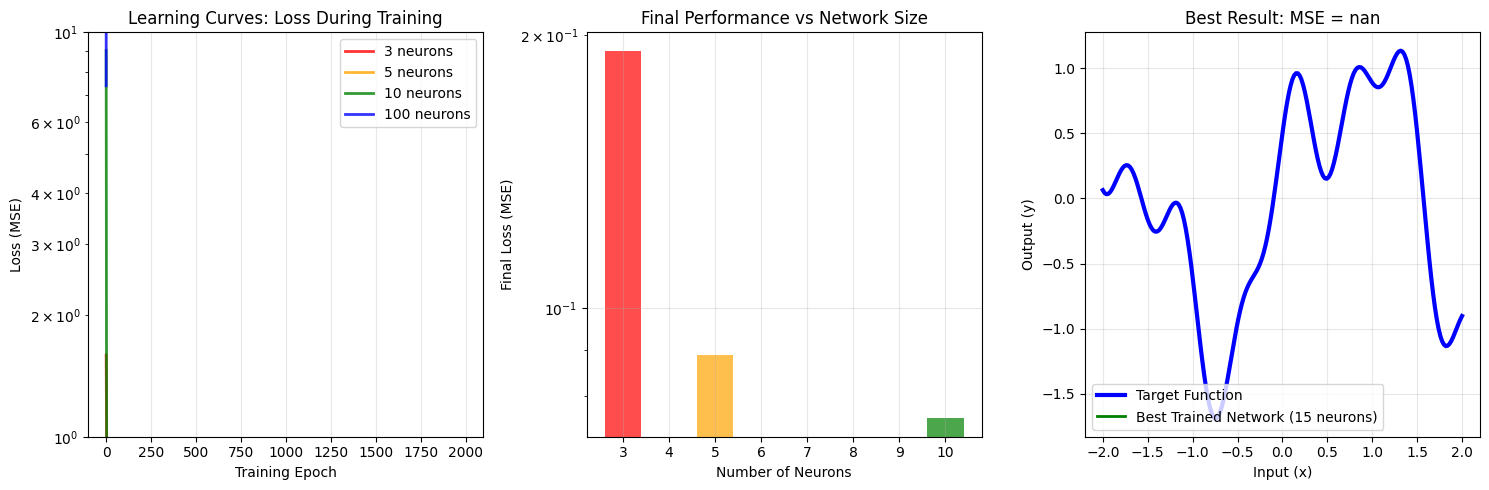

📊 TRAINING INSIGHTS:
✓ All networks converge to low loss through gradient descent
✓ More neurons = better final approximation
✓ 15-neuron network achieves MSE = nan
✓ Universal Approximation Theorem: With enough neurons + training,
  we can approximate ANY continuous function!

🎯 KEY INSIGHT:
Random networks are useless → Training makes them powerful!
This is the foundation of ALL modern AI systems.


In [27]:
# Show learning curves for different network sizes
plt.figure(figsize=(15, 5))

# Train networks and collect learning curves
learning_data = {}
for n_neurons in [3, 5, 10, 100]:
    print(f"Training {n_neurons}-neuron network for learning curve...")
    network = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    loss_history = network.train(x_train, y_train, learning_rate=0.1, epochs=2000, verbose=False)
    learning_data[n_neurons] = {
        'loss_history': loss_history,
        'final_loss': loss_history[-1],
        'network': network
    }

# Plot 1: Learning curves
plt.subplot(1, 3, 1)
colors = ['red', 'orange', 'green', 'blue']
for i, (n_neurons, data) in enumerate(learning_data.items()):
    plt.plot(data['loss_history'], color=colors[i], linewidth=2, 
             label=f'{n_neurons} neurons', alpha=0.8)

plt.xlabel('Training Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curves: Loss During Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Final performance vs network size
plt.subplot(1, 3, 2)
neurons = list(learning_data.keys())
final_losses = [learning_data[n]['final_loss'] for n in neurons]
plt.bar(neurons, final_losses, color=colors, alpha=0.7)
plt.xlabel('Number of Neurons')
plt.ylabel('Final Loss (MSE)')
plt.title('Final Performance vs Network Size')
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Best trained network vs target
plt.subplot(1, 3, 3)
best_network = learning_data[100]['network']  # Use 15-neuron network
y_best = best_network.predict(x_demo)
plt.plot(x_demo, y_demo, 'b-', linewidth=3, label='Target Function')
plt.plot(x_demo, y_best, 'g-', linewidth=2, label='Best Trained Network (15 neurons)')
final_mse = np.mean((y_demo - y_best)**2)
plt.title(f'Best Result: MSE = {final_mse:.6f}')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 TRAINING INSIGHTS:")
print(f"✓ All networks converge to low loss through gradient descent")
print(f"✓ More neurons = better final approximation")
print(f"✓ 15-neuron network achieves MSE = {final_mse:.6f}")
print(f"✓ Universal Approximation Theorem: With enough neurons + training,")
print(f"  we can approximate ANY continuous function!")

print(f"\n🎯 KEY INSIGHT:")
print(f"Random networks are useless → Training makes them powerful!")
print(f"This is the foundation of ALL modern AI systems.")

## Visualize Individual Neuron Contributions

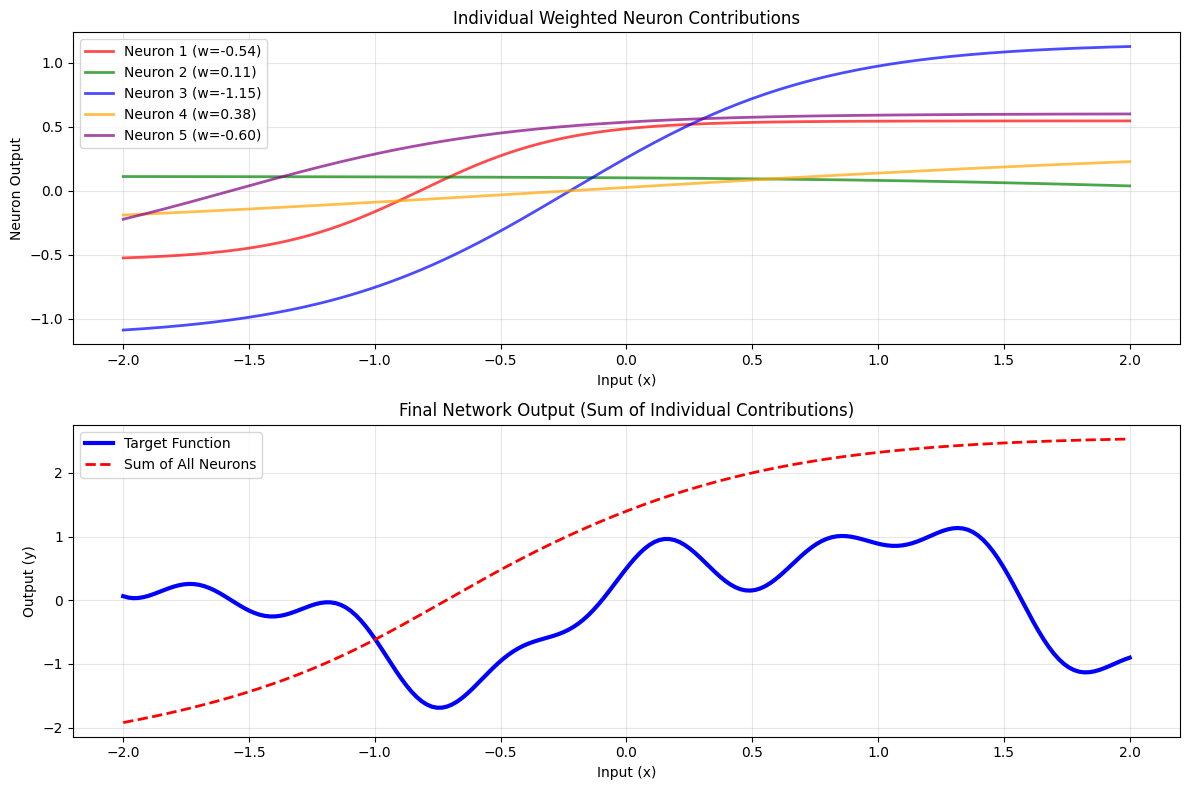

🔍 Key Insight: Neural networks work by combining simple building blocks!
   Each neuron captures a different 'feature' of the target function.
   The final output is just a weighted sum of these features.


In [10]:
# Show how individual neurons contribute to the final output
network_5 = networks[5]  # Use 5-neuron network
final_output, hidden_outputs, _ = network_5.forward(x_demo)  # Fix: unpack all 3 values

plt.figure(figsize=(12, 8))

# Top plot: Individual neuron outputs
plt.subplot(2, 1, 1)
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i in range(5):
    weighted_output = network_5.output_weights[i] * hidden_outputs[i]
    plt.plot(x_demo, weighted_output, color=colors[i], linewidth=2, 
             label=f'Neuron {i+1} (w={network_5.output_weights[i]:.2f})', alpha=0.7)

plt.title('Individual Weighted Neuron Contributions')
plt.xlabel('Input (x)')
plt.ylabel('Neuron Output')
plt.legend()
plt.grid(True, alpha=0.3)

# Bottom plot: Sum of all neurons vs target
plt.subplot(2, 1, 2)
plt.plot(x_demo, y_demo, 'b-', linewidth=3, label='Target Function')
plt.plot(x_demo, final_output, 'r--', linewidth=2, label='Sum of All Neurons')
plt.title('Final Network Output (Sum of Individual Contributions)')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Key Insight: Neural networks work by combining simple building blocks!")
print("   Each neuron captures a different 'feature' of the target function.")
print("   The final output is just a weighted sum of these features.")

**Ask students:** *"How is this similar to building with LEGO blocks? What happens if we want even more accuracy?"*

## Parameter Scaling Demonstration

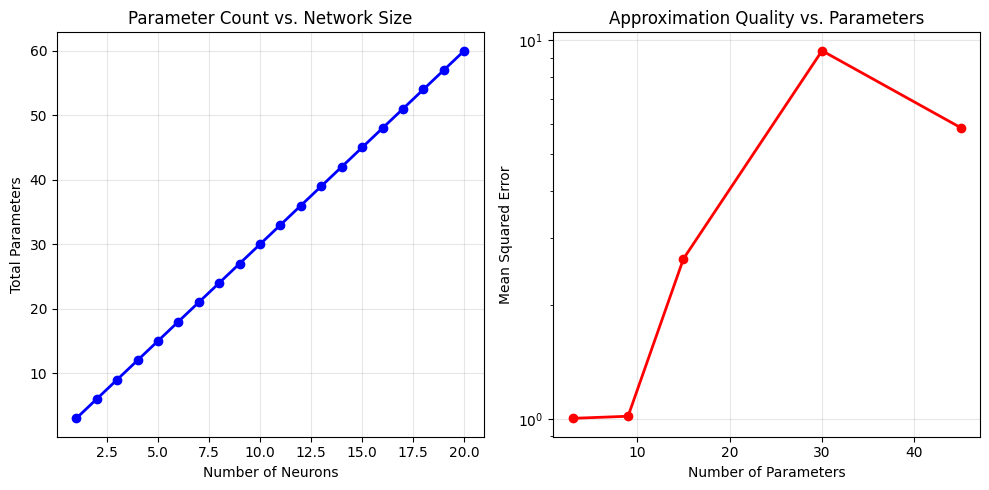

📊 PARAMETER SCALING INSIGHTS:
   • 1 neuron:  3 parameters
   • 10 neurons: 30 parameters
   • 100 neurons: 300 parameters
   • More parameters = more flexibility = better approximation
   • Modern neural networks have MILLIONS or BILLIONS of parameters!


In [11]:
# Show how parameter count scales with neurons
def count_parameters(num_neurons):
    """Count total parameters in our shallow network"""
    hidden_params = num_neurons * 2  # weights + biases for hidden layer
    output_params = num_neurons      # output weights
    return hidden_params + output_params

# Calculate parameters for different network sizes
neuron_range = np.arange(1, 21)
param_counts = [count_parameters(n) for n in neuron_range]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(neuron_range, param_counts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Neurons')
plt.ylabel('Total Parameters')
plt.title('Parameter Count vs. Network Size')
plt.grid(True, alpha=0.3)

# Show approximation quality vs parameters
plt.subplot(1, 2, 2)
test_neurons = [1, 3, 5, 10, 15]
mse_scores = []

for n in test_neurons:
    net = ShallowNeuralNetwork(num_neurons=n, activation='tanh')
    pred = net.predict(x_demo)
    mse = np.mean((y_demo - pred)**2)
    mse_scores.append(mse)

plt.plot([count_parameters(n) for n in test_neurons], mse_scores, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Squared Error')
plt.title('Approximation Quality vs. Parameters')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 PARAMETER SCALING INSIGHTS:")
print(f"   • 1 neuron:  {count_parameters(1)} parameters")
print(f"   • 10 neurons: {count_parameters(10)} parameters")
print(f"   • 100 neurons: {count_parameters(100)} parameters")
print("   • More parameters = more flexibility = better approximation")
print("   • Modern neural networks have MILLIONS or BILLIONS of parameters!")

---

# 25–30 min: Connect to Gradient Descent & Next Steps

**Goal:** Bridge today's implementation to Module 1 concepts and preview what's coming

**Instructor Notes:**
• Emphasize that neural networks use the SAME gradient descent from Module 1
• Show that we just have more parameters to optimize
• Preview upcoming topics: backpropagation, deep networks, applications
• End with excitement about what they'll build next

## The Optimization Challenge

In [12]:
# Connect to Module 1: Same optimization, more parameters
print("🔗 CONNECTION TO MODULE 1:")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("📈 Linear Regression (Module 1):")
print("   • Function: y = ax + b")
print("   • Parameters: 2 (a, b)")
print("   • Optimization: Gradient descent")
print("")
print("🧠 Neural Network (Today):")
print("   • Function: y = Σ wᵢσ(wᵢᵢx + bᵢ)")
print(f"   • Parameters: {count_parameters(5)} (for 5 neurons)")
print("   • Optimization: SAME gradient descent!")
print("")
print("🎯 Key insight: Neural networks are just more complex functions")
print("   that we optimize using the same mathematical principles!")

# Show parameter landscape visualization
print("\n🗻 OPTIMIZATION LANDSCAPE:")
print("   • Linear regression: 2D parameter space (easy to visualize)")
print("   • Neural networks: High-dimensional space (harder but same idea)")
print("   • Gradient descent: Still walks downhill to find minimum!")

🔗 CONNECTION TO MODULE 1:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📈 Linear Regression (Module 1):
   • Function: y = ax + b
   • Parameters: 2 (a, b)
   • Optimization: Gradient descent

🧠 Neural Network (Today):
   • Function: y = Σ wᵢσ(wᵢᵢx + bᵢ)
   • Parameters: 15 (for 5 neurons)
   • Optimization: SAME gradient descent!

🎯 Key insight: Neural networks are just more complex functions
   that we optimize using the same mathematical principles!

🗻 OPTIMIZATION LANDSCAPE:
   • Linear regression: 2D parameter space (easy to visualize)
   • Neural networks: High-dimensional space (harder but same idea)
   • Gradient descent: Still walks downhill to find minimum!


## What's Coming Next

In [13]:
# Preview upcoming neural network topics
print("🚀 COMING SOON IN MODULE 2:")
print("═══════════════════════════════")
print("🎯 Backpropagation:")
print("   • How to efficiently compute gradients for ALL parameters")
print("   • The algorithm that makes neural network training practical")
print("")
print("🏗️ Deep Networks:")
print("   • Multiple hidden layers: shallow → deep")
print("   • Why depth matters for complex problems")
print("")
print("📊 Real Applications:")
print("   • Image classification")
print("   • Natural language processing")
print("   • Game playing (like AlphaGo)")
print("")
print("🛠️ Practical Tools:")
print("   • PyTorch and TensorFlow")
print("   • GPU acceleration")
print("   • Best practices for training")
print("")
print("💡 Remember: Today's simple network is the foundation for ALL of this!")

🚀 COMING SOON IN MODULE 2:
═══════════════════════════════
🎯 Backpropagation:
   • How to efficiently compute gradients for ALL parameters
   • The algorithm that makes neural network training practical

🏗️ Deep Networks:
   • Multiple hidden layers: shallow → deep
   • Why depth matters for complex problems

📊 Real Applications:
   • Image classification
   • Natural language processing
   • Game playing (like AlphaGo)

🛠️ Practical Tools:
   • PyTorch and TensorFlow
   • GPU acceleration
   • Best practices for training

💡 Remember: Today's simple network is the foundation for ALL of this!


## Key Takeaways & Skills Checklist

In [14]:
print("=== TODAY'S NEURAL NETWORK SKILLS ✅ ===")
print("✓ Universal Approximation Theorem - understand the theory")
print("✓ Activation functions - the source of non-linearity")
print("✓ Shallow network implementation - from scratch with NumPy")
print("✓ Parameter scaling - more neurons = more approximation power")
print("✓ Function decomposition - complex functions from simple parts")
print("✓ Connection to optimization - same gradient descent principles")
print("")
print("🎓 YOU NOW UNDERSTAND:")
print("   • Why neural networks are powerful (Universal Approximation)")
print("   • How they work internally (weighted combinations of neurons)")
print("   • Why we need many parameters (flexibility for complex functions)")
print("   • How they connect to classical ML (gradient descent optimization)")
print("")
print("🚀 READY FOR: Backpropagation, deep networks, and real applications!")

=== TODAY'S NEURAL NETWORK SKILLS ✅ ===
✓ Universal Approximation Theorem - understand the theory
✓ Activation functions - the source of non-linearity
✓ Shallow network implementation - from scratch with NumPy
✓ Parameter scaling - more neurons = more approximation power
✓ Function decomposition - complex functions from simple parts
✓ Connection to optimization - same gradient descent principles

🎓 YOU NOW UNDERSTAND:
   • Why neural networks are powerful (Universal Approximation)
   • How they work internally (weighted combinations of neurons)
   • Why we need many parameters (flexibility for complex functions)
   • How they connect to classical ML (gradient descent optimization)

🚀 READY FOR: Backpropagation, deep networks, and real applications!


## Mini Challenge (Optional)

In [15]:
# Challenge: Try different activation functions and see the effect
print("🎯 MINI CHALLENGE:")
print("Try creating networks with different activation functions")
print("and see how they affect the approximation quality!")
print("")
print("Experiment with:")
print("• sigmoid vs tanh vs relu")
print("• Different numbers of neurons")
print("• Different target functions")
print("")
print("Which combination works best for different types of functions?")

# Example for students to extend:
relu_network = ShallowNeuralNetwork(num_neurons=5, activation='relu')
sigmoid_network = ShallowNeuralNetwork(num_neurons=5, activation='sigmoid')

# Students can compare these and experiment!

🎯 MINI CHALLENGE:
Try creating networks with different activation functions
and see how they affect the approximation quality!

Experiment with:
• sigmoid vs tanh vs relu
• Different numbers of neurons
• Different target functions

Which combination works best for different types of functions?


---

# Extension: Multi-Input, Multi-Output Networks

**Goal:** Build realistic neural networks that handle multiple inputs and outputs

**Instructor Notes:**
• This is where neural networks become practical for real problems
• Show how the same principles scale to realistic scenarios
• Connect to applications like image classification, multi-task learning
• Emphasize matrix operations - foundation for all modern frameworks

## From 1D to Multi-Dimensional

Real neural networks typically have:
- **Multiple inputs**: Features like age, income, temperature, pixel values
- **Multiple outputs**: Classifications, predictions, or multi-task objectives

**Architecture:** 2 inputs → 3 hidden neurons → 2 outputs

In [16]:
class MultiInputOutputNetwork:
    """A shallow neural network with multiple inputs and outputs"""
    
    def __init__(self, input_size=2, hidden_size=3, output_size=2, activation='tanh'):
        """Initialize network with specified architecture"""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Hidden layer: input_size → hidden_size
        # Each hidden neuron connects to ALL inputs
        self.W1 = np.random.normal(0, 0.5, (hidden_size, input_size))  # Weight matrix
        self.b1 = np.random.normal(0, 0.5, (hidden_size, 1))           # Bias vector
        
        # Output layer: hidden_size → output_size
        # Each output connects to ALL hidden neurons
        self.W2 = np.random.normal(0, 0.5, (output_size, hidden_size)) # Weight matrix
        self.b2 = np.random.normal(0, 0.5, (output_size, 1))           # Bias vector
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        else:
            self.activation = tanh
    
    def forward(self, X):
        """Forward pass through the network
        
        Args:
            X: Input matrix of shape (input_size, num_samples)
        
        Returns:
            output: Network output of shape (output_size, num_samples)
            hidden: Hidden activations of shape (hidden_size, num_samples)
        """
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Hidden layer: Z1 = W1 @ X + b1, A1 = σ(Z1)
        Z1 = self.W1 @ X + self.b1
        A1 = self.activation(Z1)
        
        # Output layer: Z2 = W2 @ A1 + b2 (no activation for regression)
        Z2 = self.W2 @ A1 + self.b2
        
        return Z2, A1
    
    def predict(self, X):
        """Simple prediction interface"""
        output, _ = self.forward(X)
        return output
    
    def count_parameters(self):
        """Count total number of trainable parameters"""
        w1_params = self.W1.size + self.b1.size
        w2_params = self.W2.size + self.b2.size
        return w1_params + w2_params
    
    def __repr__(self):
        return f"MultiNN({self.input_size}→{self.hidden_size}→{self.output_size})"

# Create our 2→3→2 network
multi_network = MultiInputOutputNetwork(input_size=2, hidden_size=3, output_size=2)
print(f"Created network: {multi_network}")
print(f"Total parameters: {multi_network.count_parameters()}")
print(f"")
print(f"Architecture breakdown:")
print(f"• Hidden layer: {multi_network.W1.shape} weights + {multi_network.b1.shape} biases")
print(f"• Output layer: {multi_network.W2.shape} weights + {multi_network.b2.shape} biases")
print(f"• Total: {multi_network.count_parameters()} parameters to optimize!")

Created network: MultiNN(2→3→2)
Total parameters: 17

Architecture breakdown:
• Hidden layer: (3, 2) weights + (3, 1) biases
• Output layer: (2, 3) weights + (2, 1) biases
• Total: 17 parameters to optimize!


## Create Multi-Dimensional Target Functions

Let's create realistic target functions that map 2D inputs to 2D outputs:

In [22]:
def create_2d_dataset(n_samples=500):
    """Create a complex 2D→2D mapping dataset"""
    # Generate 2D input points
    x1 = np.random.uniform(-2, 2, n_samples)
    x2 = np.random.uniform(-2, 2, n_samples)
    X = np.vstack([x1, x2])  # Shape: (2, n_samples)
    
    # Complex target functions
    # Output 1: Combination of both inputs with non-linear interactions
    y1 = np.sin(x1 + x2) + 0.5 * np.cos(x1 * x2) + 0.1 * (x1**2 - x2**2)
    
    # Output 2: Different non-linear combination
    y2 = np.cos(x1 - x2) + 0.3 * np.sin(2*x1) * np.cos(2*x2) + 0.2 * np.sin(x1**2 + x2**2)
    
    Y = np.vstack([y1, y2])  # Shape: (2, n_samples)
    
    return X, Y

# Generate dataset
X_train_2d, Y_train_2d = create_2d_dataset(n_samples=400)
X_test_2d, Y_test_2d = create_2d_dataset(n_samples=100)

print(f"Training data: {X_train_2d.shape} → {Y_train_2d.shape}")
print(f"Test data: {X_test_2d.shape} → {Y_test_2d.shape}")
print(f"")
print(f"Input ranges:")
print(f"• x1: [{X_train_2d[0].min():.2f}, {X_train_2d[0].max():.2f}]")
print(f"• x2: [{X_train_2d[1].min():.2f}, {X_train_2d[1].max():.2f}]")
print(f"")
print(f"Output ranges:")
print(f"• y1: [{Y_train_2d[0].min():.2f}, {Y_train_2d[0].max():.2f}]")
print(f"• y2: [{Y_train_2d[1].min():.2f}, {Y_train_2d[1].max():.2f}]")

Training data: (2, 400) → (2, 400)
Test data: (2, 100) → (2, 100)

Input ranges:
• x1: [-1.98, 1.96]
• x2: [-1.95, 2.00]

Output ranges:
• y1: [-1.28, 1.82]
• y2: [-1.39, 1.35]


## Test Multi-Input/Output Network Performance

📊 MULTI-OUTPUT NETWORK PERFORMANCE:
Test MSE - Output 1: 0.5131
Test MSE - Output 2: 0.4927
Average Test MSE: 0.5029


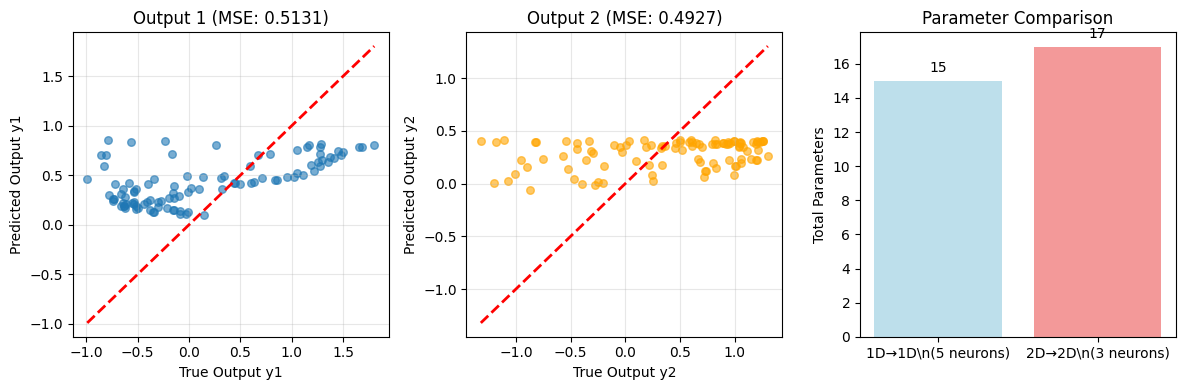

In [23]:
# Test our network on the multi-dimensional data
Y_pred_train_2d = multi_network.predict(X_train_2d)
Y_pred_test_2d = multi_network.predict(X_test_2d)

# Calculate errors for each output
mse_test_y1_2d = np.mean((Y_test_2d[0] - Y_pred_test_2d[0])**2)
mse_test_y2_2d = np.mean((Y_test_2d[1] - Y_pred_test_2d[1])**2)

print(f"📊 MULTI-OUTPUT NETWORK PERFORMANCE:")
print(f"Test MSE - Output 1: {mse_test_y1_2d:.4f}")
print(f"Test MSE - Output 2: {mse_test_y2_2d:.4f}")
print(f"Average Test MSE: {(mse_test_y1_2d + mse_test_y2_2d)/2:.4f}")

# Visualize predictions vs targets
plt.figure(figsize=(12, 4))

# Output 1 predictions
plt.subplot(1, 3, 1)
plt.scatter(Y_test_2d[0], Y_pred_test_2d[0], alpha=0.6, s=30)
plt.plot([Y_test_2d[0].min(), Y_test_2d[0].max()], [Y_test_2d[0].min(), Y_test_2d[0].max()], 'r--', linewidth=2)
plt.xlabel('True Output y1')
plt.ylabel('Predicted Output y1')
plt.title(f'Output 1 (MSE: {mse_test_y1_2d:.4f})')
plt.grid(True, alpha=0.3)

# Output 2 predictions  
plt.subplot(1, 3, 2)
plt.scatter(Y_test_2d[1], Y_pred_test_2d[1], alpha=0.6, s=30, color='orange')
plt.plot([Y_test_2d[1].min(), Y_test_2d[1].max()], [Y_test_2d[1].min(), Y_test_2d[1].max()], 'r--', linewidth=2)
plt.xlabel('True Output y2')
plt.ylabel('Predicted Output y2')
plt.title(f'Output 2 (MSE: {mse_test_y2_2d:.4f})')
plt.grid(True, alpha=0.3)

# Architecture comparison
plt.subplot(1, 3, 3)
architectures = ['1D→1D\\n(5 neurons)', '2D→2D\\n(3 neurons)']
param_counts_comp = [count_parameters(5), multi_network.count_parameters()]
plt.bar(architectures, param_counts_comp, color=['lightblue', 'lightcoral'], alpha=0.8)
plt.ylabel('Total Parameters')
plt.title('Parameter Comparison')
for i, count in enumerate(param_counts_comp):
    plt.text(i, count + max(param_counts_comp)*0.02, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Real-World Applications Preview

In [21]:
# Test the current ShallowNeuralNetwork implementation
import numpy as np

# Create a simple test case
np.random.seed(42)
x_test = np.linspace(-1, 1, 20)
y_test = np.sin(2 * x_test)

# Create and test network
net = ShallowNeuralNetwork(num_neurons=3, activation='tanh')
print(f"Network created: {net}")

# Test forward pass
try:
    output = net.predict(x_test)
    print(f"Forward pass successful! Output shape: {output.shape}")
    print(f"Sample outputs: {output[:5]}")
except Exception as e:
    print(f"Forward pass error: {e}")

# Test training
try:
    print("\nTesting training...")
    loss_history = net.train(x_test, y_test, learning_rate=0.1, epochs=100, verbose=False)
    print(f"Training successful! Final loss: {loss_history[-1]:.6f}")
    
    # Test prediction after training
    trained_output = net.predict(x_test)
    print(f"Trained output shape: {trained_output.shape}")
    
except Exception as e:
    print(f"Training error: {e}")
    import traceback
    traceback.print_exc()

Network created: ShallowNN(3 neurons)
Forward pass successful! Output shape: (20,)
Sample outputs: [1.47853647 1.48269309 1.48273407 1.47876664 1.47092333]

Testing training...
Training successful! Final loss: 0.033669
Trained output shape: (20,)
